!pip install matplotlib seaborn

In [1]:
!pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 KB 2.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 2.2 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [3]:
from mysql.connector import connect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
conn = connect(
    host='db',
    database='sakila',
    username='root',
    password='root_pass'
)

In [25]:
sql = '''
SELECT
    f.rating,
    sum(P.amount) total_sale,
    DATE_FORMAT(P.payment_date, "%Y-%m-%d") as date
FROM
    payment P
    INNER JOIN rental r ON (P.rental_id = r.rental_id)
    INNER JOIN inventory I ON (I.inventory_id = r.inventory_id)
    INNER JOIN film f ON (I.film_id = f.film_id)
GROUP BY
    f.rating,
    date
ORDER BY
    date
'''

In [42]:
pd.to_datetime(sale_data['date'])

0     2005-05-24
1     2005-05-24
2     2005-05-24
3     2005-05-24
4     2005-05-25
         ...    
199   2006-02-14
200   2006-02-14
201   2006-02-14
202   2006-02-14
203   2006-02-14
Name: date, Length: 204, dtype: datetime64[ns]

In [43]:
sale_data = pd.read_sql(sql, conn)
sale_data['date'] = pd.to_datetime(sale_data['date'])
sale_data.head()

,rating,total_sale,date
0,R,7.98,2005-05-24
1,PG-13,1.99,2005-05-24
2,NC-17,7.98,2005-05-24
3,G,11.97,2005-05-24
4,NC-17,92.78,2005-05-25


In [44]:
sale_data_total = sale_data[['total_sale','date']].groupby('date').sum()
sale_data_total.head()

,total_sale
date,
2005-05-24,29.92
2005-05-25,573.63
2005-05-26,754.26
2005-05-27,684.34
2005-05-28,804.04


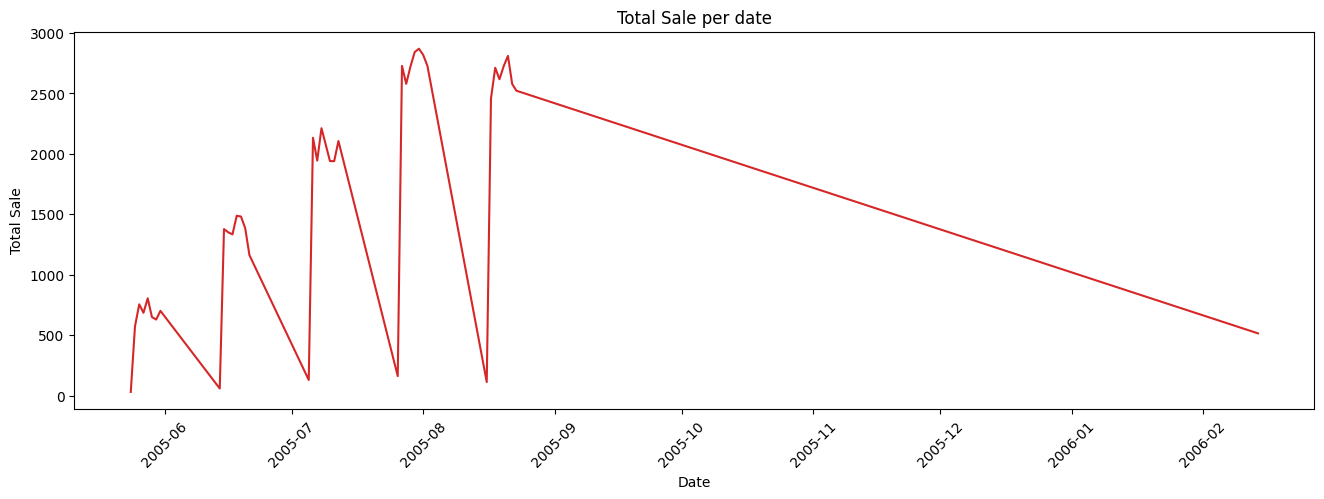

In [46]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.xticks(rotation=45)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(sale_data_total, x=sale_data_total.index, y=sale_data_total.total_sale, title='Total Sale per date', ylabel='Total Sale')    